# Analyzing Flight Booking Websites
Dataset:
- British Airways: https://www.kaggle.com/datasets/minnikeswarrao/british-airlines


In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Read the Data
df = pd.read_csv("drive/MyDrive/Dataset_Capstone/British_Airways.csv")
er = df.copy()
er.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,NaN,3.0,3,yes,7.0,I virtually gave up on British Airways about...
1,✅ Trip Verified,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,NaN,4.0,4,yes,7.0,I was pleasantly surprised that the airline ...
2,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Miami to Budapest via London,November 2022,2.0,3.0,3.0,4.0,NaN,1.0,1,no,1.0,"British Airways is late, their website is at..."
3,✅ Trip Verified,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),November 2022,3.0,2.0,1.0,NaN,NaN,4.0,2,no,4.0,Flew from Amman to London on Nov. 14 2022. No...
4,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,August 2022,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,This is the worst experience I have ever had ...


In [ ]:
er['route'].unique()

array(['London to Lisbon', 'Montreal to Edinburgh via London Heathrow',
       'Miami to Budapest via London', ..., 'London-Vancouver return',
       'LHR-ORD', 'BOM-LHR'], dtype=object)

In [ ]:
#Check baris dan kolom
er.shape

(3424, 16)

In [ ]:
#Check informasi dari data
er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1901 non-null   object 
 1   aircraft         1787 non-null   object 
 2   travel_type      2654 non-null   object 
 3   travel_class     3422 non-null   object 
 4   route            2650 non-null   object 
 5   date             2646 non-null   object 
 6   seating_comfort  3326 non-null   float64
 7   staff_service    3319 non-null   float64
 8   food_quality     3094 non-null   float64
 9   entertainment    2413 non-null   float64
 10  wifi             505 non-null    float64
 11  ground_service   2588 non-null   float64
 12  value_for_money  3424 non-null   int64  
 13  recommended      3424 non-null   object 
 14  overall_rating   3418 non-null   float64
 15  review           3424 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 428.1+ KB


In [ ]:
#check missing value
er.isnull().sum()

status             1523
aircraft           1637
travel_type         770
travel_class          2
route               774
date                778
seating_comfort      98
staff_service       105
food_quality        330
entertainment      1011
wifi               2919
ground_service      836
value_for_money       0
recommended           0
overall_rating        6
review                0
dtype: int64

## EDA

Todo!
- [x] Clean fitur status dari simbol dan miss value
- [ ] Handling missing value di fitur date
- [ ] Handling missing value di fitur status

In [ ]:
#check duplikasi data
er.duplicated().sum()

88

In [ ]:
er.drop_duplicates()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,NaN,3.0,3,yes,7.0,I virtually gave up on British Airways about...
1,✅ Trip Verified,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,NaN,4.0,4,yes,7.0,I was pleasantly surprised that the airline ...
2,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Miami to Budapest via London,November 2022,2.0,3.0,3.0,4.0,NaN,1.0,1,no,1.0,"British Airways is late, their website is at..."
3,✅ Trip Verified,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),November 2022,3.0,2.0,1.0,NaN,NaN,4.0,2,no,4.0,Flew from Amman to London on Nov. 14 2022. No...
4,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,August 2022,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,This is the worst experience I have ever had ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,NaN,NaN,NaN,Business Class,NaN,NaN,4.0,3.0,2.0,4.0,NaN,NaN,3,yes,5.0,Flew return in CW from LHR to BKK in August 20...
3420,NaN,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,0.0,NaN,NaN,3,yes,9.0,LHR to HAM. Purser addresses all club passenge...
3421,NaN,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,yes,5.0,My son who had worked for British Airways urge...
3422,NaN,NaN,NaN,Premium Economy,NaN,NaN,1.0,3.0,5.0,0.0,NaN,NaN,1,no,4.0,London City-New York JFK via Shannon on A318 b...


In [ ]:
#drop kolom yang tidak diperlukan
er.drop(columns=['review','aircraft'],axis=0, inplace=True)

### Clean fitur status dari simbol dan miss value

In [ ]:
er['status'].unique()

array(['✅ Trip Verified ', 'Not Verified ', '❎ Not Verified ', nan,
       '✅ Verified Review ', '❎ Unverified ',
       'We travelled economy from Manchester to Toronto via Heathrow The flight from Manchester to Heathrow and return was very good. The seats had plenty of room and it was easy to fit laptop size briefcases under the seat in front and still have room to stretch your legs. The service from the cabin crew was excellent. The leg from Heathrow to Toronto was not as comfortable but it was acceptable. The seats appeared narrower and my case only just fit under the seat leaving little room to stretch my legs. Whilst the cabin crew forgot requests for drinks they apologised and were very friendly and helpful in other aspects. Unfortunately BA were let down by the attendants on the return leg from Toronto to Heathrow. Whilst the aircraft appeared newer and more comfortable I have never experienced such surly behaviour from the cabin crew. We had seen attendants in the opposite ais

In [ ]:
# Delete the miss value in status
pattern = r'^We travelled.*'

# Filter out rows where 'status' matches the pattern
er = er[~er['status'].str.contains(pattern, na=False)]

In [ ]:
# delete the symbols in status
er['status'] = er['status'].str.replace(r'[✅❎]', '', regex=True).str.strip()

In [ ]:
er['status'].unique()

array(['Trip Verified', 'Not Verified', nan, 'Verified Review',
       'Unverified'], dtype=object)

### Handling missing value fitur status

In [ ]:
#Melihat data dengan status null
status = er[er['status'].isnull()]
status.head(1)

,status,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating
995,NaN,Solo Leisure,Economy Class,Belfast to Lisbon via London,March 2018,3.0,4.0,1.0,NaN,NaN,4.0,2,no,7.0


In [ ]:
#Check missing value overall rating untuk mengisi status nantinya
er = er.dropna(subset=['overall_rating'])
er.isnull().sum()

status             1517
travel_type         763
travel_class          2
route               767
date                771
seating_comfort      98
staff_service       105
food_quality        330
entertainment      1011
wifi               2912
ground_service      829
value_for_money       0
recommended           0
overall_rating        0
dtype: int64

In [ ]:
#melihat banyak baris status yang missing value
status.shape

(1523, 14)

In [ ]:
er['status'] = er['status'].fillna('Verified Review')

In [ ]:
#menggabungkan value Unverified dengan Not Verified
er['status'] = er['status'].replace({'Unverified' : 'Not Verified'})

In [ ]:
er['status'] = er['status'].replace({'Not Verified' : 'Verified Review'})

In [ ]:
#merubah status menjadi numerik untuk keperluan dashboard
er['status_num'] = er['status'].replace({'Verified Review' : 1, 'Trip Verified' : 2})

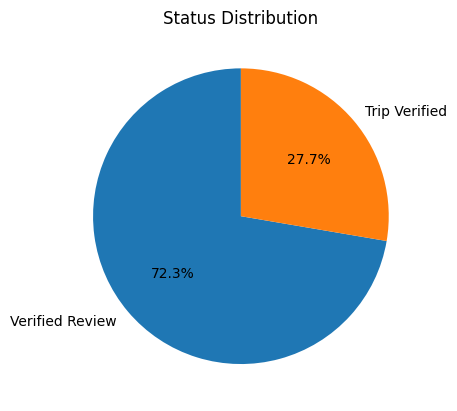

In [ ]:
# Menghitung jumlah setiap status
stat_pie = er['status'].value_counts()

# Membuat pie chart
stat_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Status Distribution')
plt.ylabel('')
plt.show()


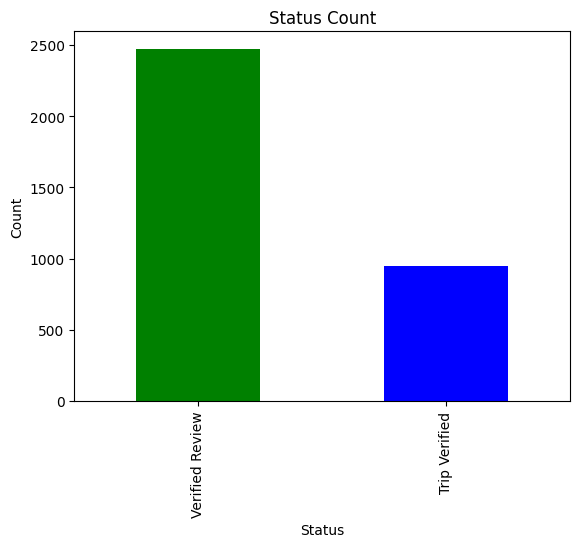

In [ ]:
# Menghitung jumlah setiap status
stat = er['status'].value_counts()

# Membuat bar chart dengan warna berbeda
colors = ['green','blue','red']
stat.plot(kind='bar', color=colors)
plt.title('Status Count')
plt.ylabel('Count')
plt.xlabel('Status')
plt.show()

###  Handling missing value di fitur date

In [ ]:
er['date'].isnull().sum()

771

In [ ]:
#check the nan value on date columns
nan_date = er[er['date'].isna()]
nan_date.shape

(771, 15)

In [ ]:
nan_date.head()

,status,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,status_num
2569,Verified Review,Business,Economy Class,LHR to VIE return,NaN,3.0,2.0,2.0,NaN,NaN,2.0,3,no,3.0,1
2647,Verified Review,Business,Business Class,FRA-LHR,NaN,5.0,2.0,2.0,1.0,NaN,NaN,1,no,4.0,1
2648,Verified Review,Couple Leisure,Business Class,Gatwick to Barbados,NaN,3.0,4.0,3.0,4.0,NaN,NaN,3,no,5.0,1
2649,Verified Review,Business,Business Class,Kiev to London,NaN,3.0,5.0,NaN,4.0,1.0,NaN,4,yes,8.0,1
2650,Verified Review,Family Leisure,Economy Class,NaN,NaN,3.0,5.0,5.0,5.0,NaN,NaN,4,yes,8.0,1


In [ ]:
#delete the row that contains NaN in date columns
er = er.dropna(subset=['date'])

# Reset the index of the cleaned DataFrame
er = er.reset_index(drop=True)

In [ ]:
er['date'].isna().sum()

0

In [ ]:
#konversi date ke datetime
er['date'] = pd.to_datetime(er['date'])

<ipython-input-29-eddd575391af>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  er['date'] = pd.to_datetime(er['date'])


In [ ]:
min = er['date'].min()
max = er['date'].max()

print('Min: ',min)
print('Max: ',max)

Min:  2014-07-01 00:00:00
Max:  2022-11-01 00:00:00


### Handling Missing Value di kolom lain

#### handling missing value di kolom travel_type, class, dan route

In [ ]:
er['travel_type'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business',
       nan], dtype=object)

In [ ]:
er['travel_class'].unique()

array(['Business Class', 'Economy Class', 'Premium Economy',
       'First Class', nan], dtype=object)

In [ ]:
er['route'].unique()

array(['London to Lisbon', 'Montreal to Edinburgh via London Heathrow',
       'Miami to Budapest via London', ..., 'ORD-LHR', 'LHR-GLA',
       'GLA-LHR'], dtype=object)

In [ ]:
#membuat variabel yang berisi 3 kolom
travel_route = ['travel_type', 'travel_class', 'route']
#menghapus missing value kolom di variabel travel_route
er = er.dropna(subset=travel_route)

In [ ]:
er.isnull().sum()

status                0
travel_type           0
travel_class          0
route                 0
date                  0
seating_comfort      95
staff_service       102
food_quality        326
entertainment      1007
wifi               2138
ground_service       57
value_for_money       0
recommended           0
overall_rating        0
status_num            0
dtype: int64

#### Handling missing value di kolom seating_comfort hingga ground_service

In [ ]:
#membuat variable columns_to_check
columns_to_check = ['seating_comfort', 'staff_service', 'food_quality', 'entertainment', 'wifi', 'ground_service']

#isi nan value di columns_to_check dengan angka 0
er[columns_to_check] = er[columns_to_check].fillna(0)

In [ ]:
#check missing value
er.isnull().sum()

status             0
travel_type        0
travel_class       0
route              0
date               0
seating_comfort    0
staff_service      0
food_quality       0
entertainment      0
wifi               0
ground_service     0
value_for_money    0
recommended        0
overall_rating     0
status_num         0
dtype: int64

### Booking_complete
Membuat fitur baru booking complete dimana 1 untuk complete dan 0 untuk fail berdasarkan parameter kolom 'seating_comfort', 'staff_service', 'food_quality', 'entertainment', 'wifi', 'ground_service'

In [ ]:
#parameter variabel
booking_parameter = ['seating_comfort', 'staff_service', 'food_quality', 'entertainment', 'wifi', 'ground_service']

# Menghapus baris dengan nilai booking_parameter 0 dan overall_rating di bawah 5
condition_to_drop = (er[booking_parameter] == 0).all(axis=1) & (er['overall_rating'] >= 5)
condition_to_drop.sum()

1

In [ ]:
#drop data yang sesuai di kondisi variabel condition_to_drop
er = er.drop(er[condition_to_drop].index)

In [ ]:
#membuat booking_fail yang berisi booking_parameter bernilai 0
booking_fail = er[er[booking_parameter].eq(0).all(axis=1)]

#melihat jumlah baris dan kolom
booking_fail.shape

(52, 15)

In [ ]:
# Membuat kolom baru booking_complete dimana 1 berarti complete dan 0 untuk kondisi di booking_fail
er['booking_complete'] = np.where(er.index.isin(booking_fail.index), 0, 1)

In [ ]:
#menghitung value di booking_complete
print(er['booking_complete'].value_counts())

booking_complete
1    2586
0      52
Name: count, dtype: int64


In [ ]:
#reset index
er = er.reset_index(drop=True)

## Jumlah Pengguna Aktif
Menunjukkan seberapa banyak pengguna yang menggunakan website secara
rutin.


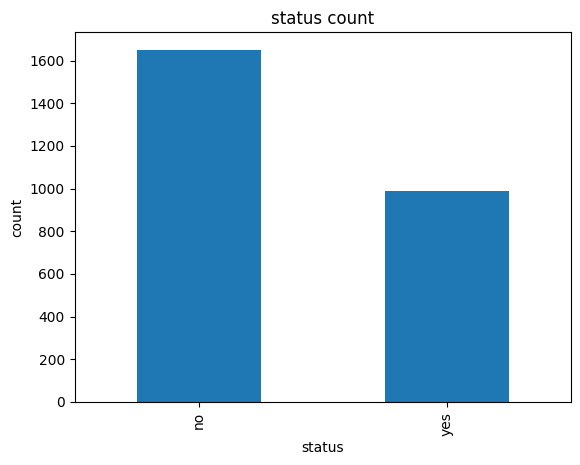

In [ ]:
# menghitung jumlah yes dan no pada kolom recommended
recommend = er['recommended'].value_counts()

recommend.plot(kind='bar')
plt.title('status count')
plt.ylabel('count')
plt.xlabel('status')
plt.show()

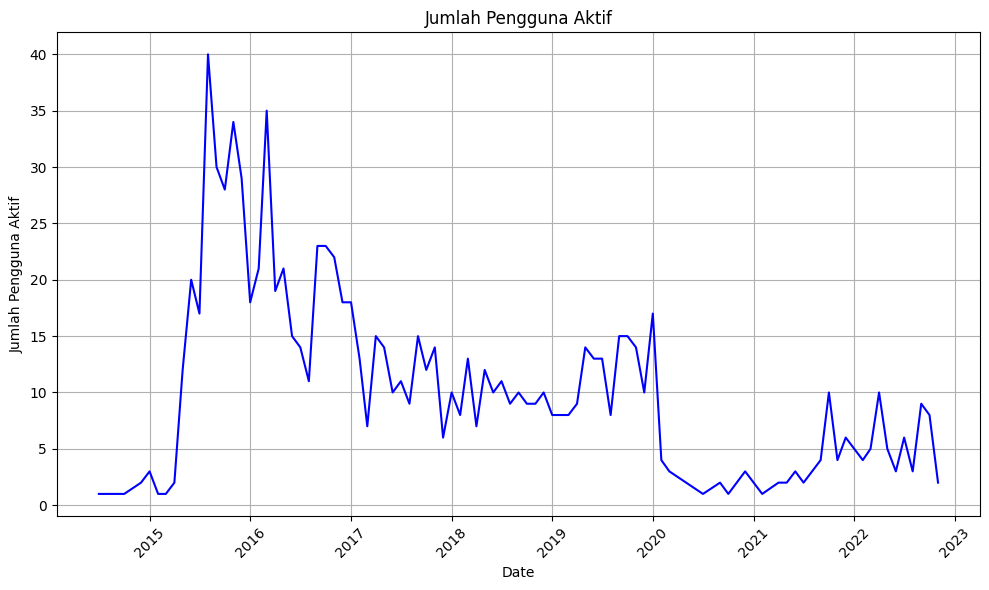

In [ ]:
#menghitung jumlah pengguna rutin berdasarkan recommended yes

#merubah value recommended 0 dan 1
er['recommended_num'] = er['recommended'].replace({'no' : 0, 'yes' : 1})

#filter recommended yes
filtered_er = er[er['recommended_num'] == 1]

# Menghitung jumlah baris per tanggal
date_counts = filtered_er.groupby('date').size()

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, linestyle='-', color='b')
plt.title('Jumlah Pengguna Aktif')
plt.xlabel('Date')
plt.ylabel('Jumlah Pengguna Aktif')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

In [ ]:
er.head()

,status,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,status_num,booking_complete,recommended_num
0,Trip Verified,Solo Leisure,Business Class,London to Lisbon,2022-11-01,3.0,4.0,4.0,0.0,0.0,3.0,3,yes,7.0,2,1,1
1,Trip Verified,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,2022-01-01,4.0,4.0,4.0,4.0,0.0,4.0,4,yes,7.0,2,1,1
2,Trip Verified,Solo Leisure,Economy Class,Miami to Budapest via London,2022-11-01,2.0,3.0,3.0,4.0,0.0,1.0,1,no,1.0,2,1,0
3,Trip Verified,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),2022-11-01,3.0,2.0,1.0,0.0,0.0,4.0,2,no,4.0,2,1,0
4,Trip Verified,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,2022-08-01,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,2,1,0


## Jumlah Pemesan Tiket
Menunjukkan seberapa banyak tiket yang berhasil terjual melalui website.


In [ ]:
#Melihat data
er.head(1)

,status,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,status_num,booking_complete,recommended_num
0,Trip Verified,Solo Leisure,Business Class,London to Lisbon,2022-11-01,3.0,4.0,4.0,0.0,0.0,3.0,3,yes,7.0,2,1,1


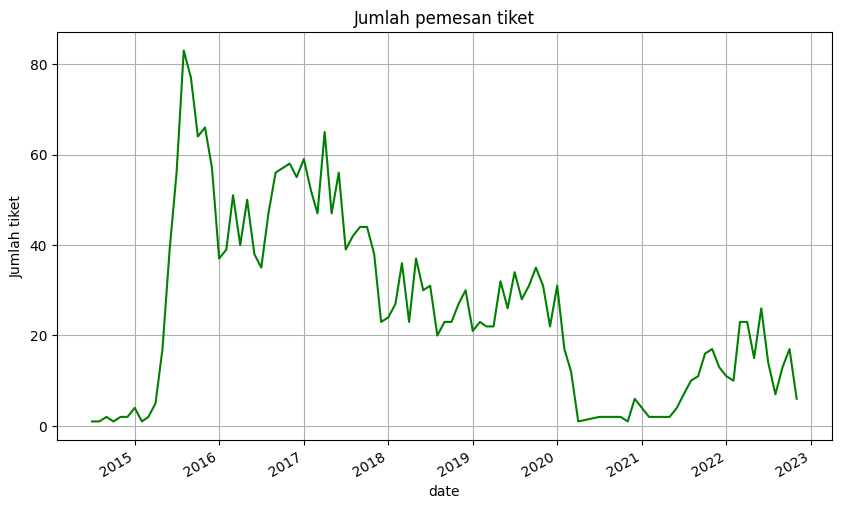

In [ ]:
#filter untuk kolom status dengan value yang 'Trip Verified'
filtered_status = er[er['booking_complete']== 1]

#melakukan grupby berdasarkan date
tiket = filtered_status.groupby('date').size()

#Visualisasi
tiket.plot(style="-", figsize=(10, 6), title="Jumlah pemesan tiket", color='g')
plt.ylabel('Jumlah tiket')
plt.grid(True)
plt.show()

## Customer satisfaction
Tingkat kepuasan pengguna terhadap fitur dan layanan yang disediakan oleh
website.


In [ ]:
er.head(1)

,status,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,status_num,booking_complete,recommended_num
0,Trip Verified,Solo Leisure,Business Class,London to Lisbon,2022-11-01,3.0,4.0,4.0,0.0,0.0,3.0,3,yes,7.0,2,1,1


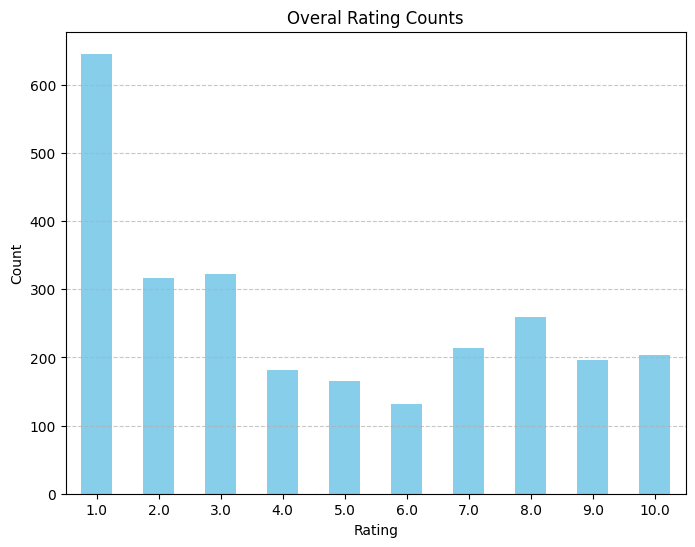

In [ ]:
#menghitung value overall rating untuk customer satisfication
cs = er['overall_rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
cs.plot(kind='bar', color='skyblue')
plt.title('Overal Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

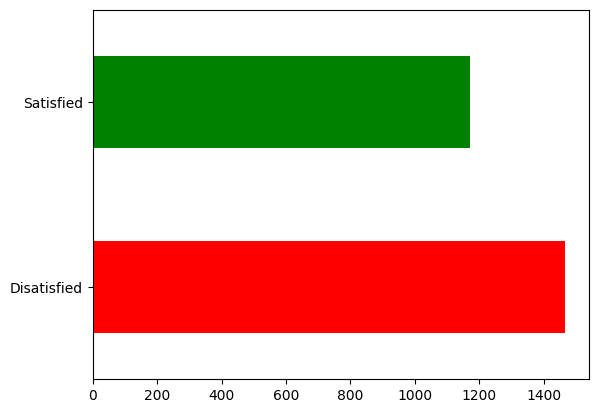

In [ ]:
#Membuat kolom baru dengan konversi jika overall rating diatas 4 maka satisfied
er['satisfication'] = np.where(er['overall_rating'] >= 5.0, 'Satisfied', 'Disatisfied')

satisfied = er['satisfication'].value_counts()

satisfied.plot(kind='barh', color=['red','green'])
plt.ylabel('')
plt.show()

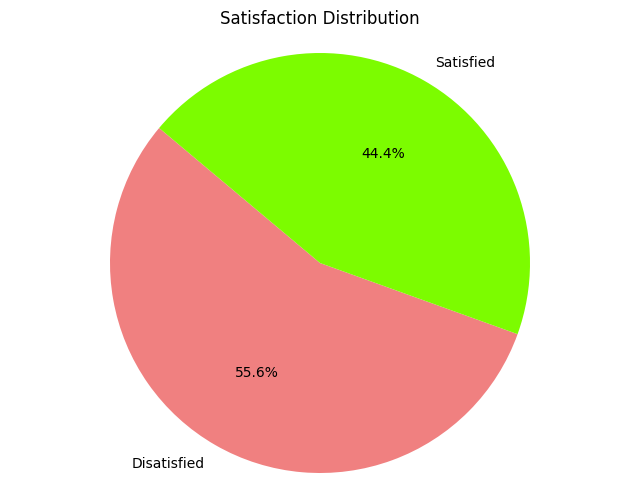

In [ ]:
# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(satisfied, labels=satisfied.index, autopct='%1.1f%%', colors=['lightcoral', 'lawngreen'], startangle=140)
plt.title('Satisfaction Distribution')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

## Conversion rate
Rasio antara jumlah pengunjung website dan jumlah pengguna yang berhasil
melakukan transaksi
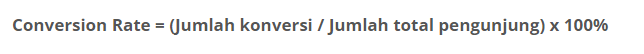

In [ ]:
#membuat formula conversion rate
jumlah_konversi = er[er['booking_complete']== 1].groupby('date').size()
total_pengunjung = er.groupby('date').size()

In [ ]:
# Menggabungkan hasil perhitungan ke DataFrame baru
conversion_df = pd.DataFrame({
    'jumlah_konversi': jumlah_konversi,
    'total_pengunjung': total_pengunjung
})

# Menghitung conversion rate
conversion_df['conversion_rate'] = (conversion_df['jumlah_konversi'] / conversion_df['total_pengunjung']) * 100

# Reset index agar 'date' menjadi kolom biasa
conversion_df = conversion_df.reset_index()

# Menggabungkan kembali ke DataFrame asli berdasarkan 'date'
er = pd.merge(er, conversion_df[['date', 'conversion_rate']], on='date', how='left')

In [ ]:
#urutkan data berdasarkan date
er = er.sort_values(by='date')

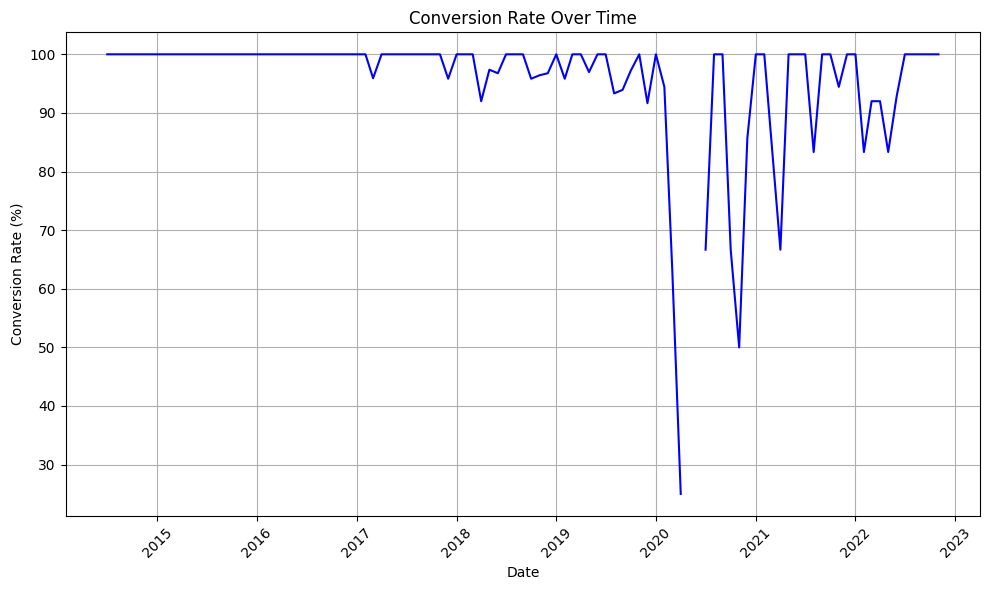

In [ ]:
# Plotting line chart
plt.figure(figsize=(10, 6))
plt.plot(er['date'], er['conversion_rate'], linestyle='-', color='b', label='Conversion Rate')
plt.title('Conversion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)  # Rotasi label tanggal jika perlu
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
#mengisi missing value pada conversion rate dengan 0
er['conversion_rate'] = er['conversion_rate'].fillna(0)

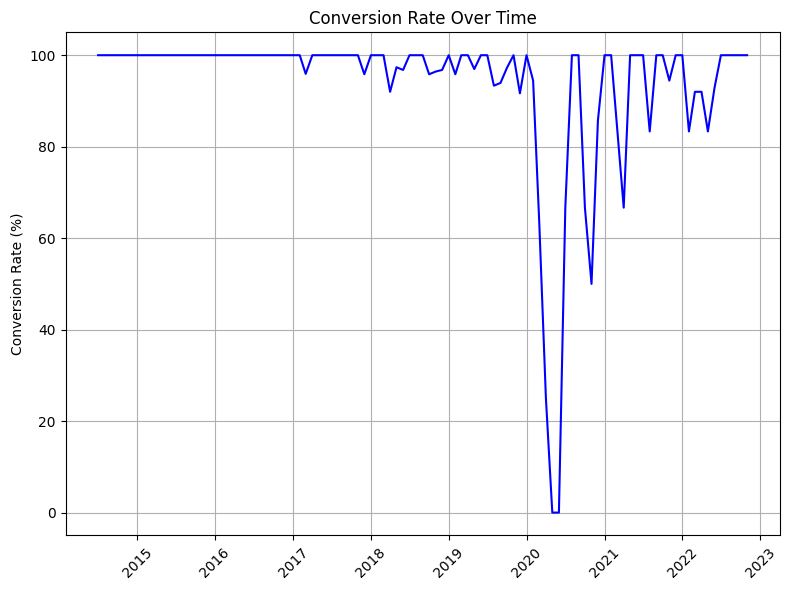

In [ ]:
# Plotting line chart
plt.figure(figsize=(8, 6))
plt.plot(er['date'], er['conversion_rate'], linestyle='-', color='b', label='Conversion Rate')
plt.title('Conversion Rate Over Time')
plt.xlabel('')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)  # Rotasi label tanggal jika perlu
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
#total conversion rate 2014 - 2022
a = er[er['booking_complete']== 1].groupby('date').size().sum()
b = er.shape[0]
conversion_rate_total = (a/b) * 100

print(f'Total Conversion Rate: {conversion_rate_total:.2f}%')

Total Conversion Rate: 98.03%


## Error Rate
Tingkat keberhasilan pengguna dalam menyelesaikan proses pemesanan tiket tanpa terjadi
kesalahan atau gangguan.
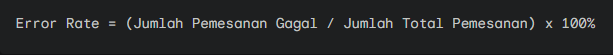

In [ ]:
#membuat formula conversion rate
jumlah_gagal = er[er['booking_complete']== 0].groupby('date').size()
total_pemesanan = er.groupby('date').size()
error_rate = (jumlah_gagal/total_pemesanan) * 100

In [ ]:
# Membuat DataFrame baru untuk error rate
error_df = pd.DataFrame({
    'date': error_rate.index,
    'error_rate': error_rate.values
})

# Merge error rate ke DataFrame asli 'er'
er = pd.merge(er, error_df, on='date', how='left')

In [ ]:
#mengisi nan error rate dengan 0
er['error_rate'] = er['error_rate'].fillna(0)

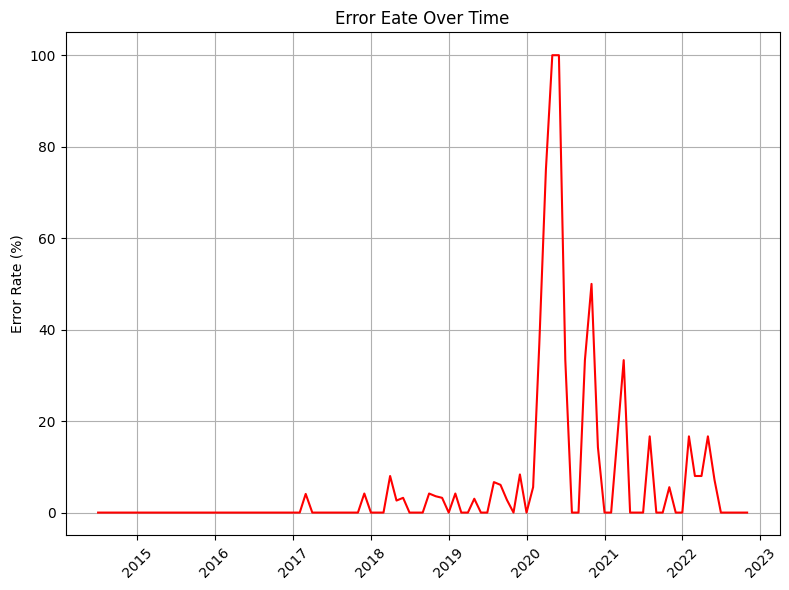

In [ ]:
# Plotting line chart
plt.figure(figsize=(8, 6))
plt.plot(er['date'], er['error_rate'], linestyle='-', color='r', label='error_rate')
plt.title('Error Eate Over Time')
plt.xlabel('')
plt.ylabel('Error Rate (%)')
plt.xticks(rotation=45)  # Rotasi label tanggal jika perlu
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()

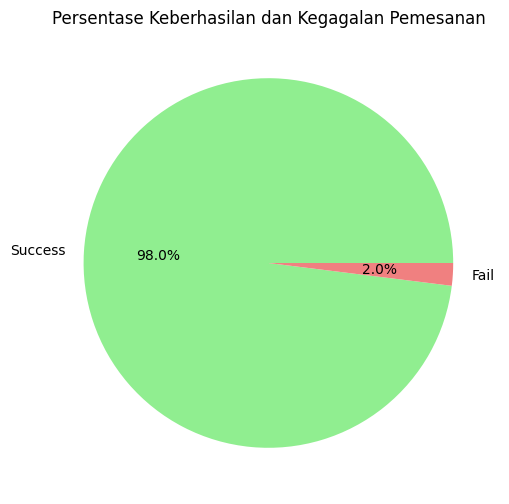

In [ ]:
#mengambil value dari booking complete
pie = er['booking_complete'].value_counts()

# Definisikan label untuk menggantikan 0 dan 1
labels = ['Success' if index == 1 else 'Fail' for index in pie.index]

#visualisasi
plt.figure(figsize=(8, 6))
pie.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','Lightcoral'], labels=labels),
plt.title("Persentase Keberhasilan dan Kegagalan Pemesanan")
plt.ylabel('')
plt.show()

## Download csv

In [ ]:
er.to_csv('British_airline_dataset_final.csv', index=False)